1 - psoriasis : Psoriasis is a skin disease that causes red, itchy scaly patches, most commonly on the knees, elbows, trunk and scalp

2 - seborrheic dermatitis : Seborrheic (seb-o-REE-ik) dermatitis is a common skin condition that mainly affects your scalp

3 - lichen planus : Lichen planus (LIE-kun PLAY-nus) is a condition that can cause swelling and irritation in the skin, hair, nails and mucous membranes

4 - pityriasis rosea : Pityriasis rosea is a rash that usually begins as a large circular or oval spot on your chest, abdomen or back

5 - cronic dermatitis : Atopic dermatitis (eczema) is a condition that makes your skin red and itchy

6 - pityriasis rubra pilaris: Pityriasis rubra pilaris (PRP) is a rare inflammatory papulosquamous disorder of unknown etiology

# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

# LOADING DATA

In [69]:
data = pd.read_csv('dermatology.csv')

# DATA SHAPE

In [70]:
data.shape

(366, 35)

# DATA GLIMPS

In [71]:
data.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55.0,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8.0,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26.0,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40.0,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45.0,3


# CHANGE COLUMN NAME

In [72]:
data.rename(columns={'class':'disease'}, inplace=True)

# MISSING VALUE

In [73]:
data.isnull().sum()[data.isnull().sum()>0]

age    8
dtype: int64

# MISSING VALUE IMPUTATION

In [74]:
data['age'].fillna(data['age'].mean(),inplace=True)

# MISSING VALUE

In [75]:
data.isnull().sum()[data.isnull().sum()>0]

Series([], dtype: int64)

# PLOT DISTRIBUTION OF AGE VS DISEASE

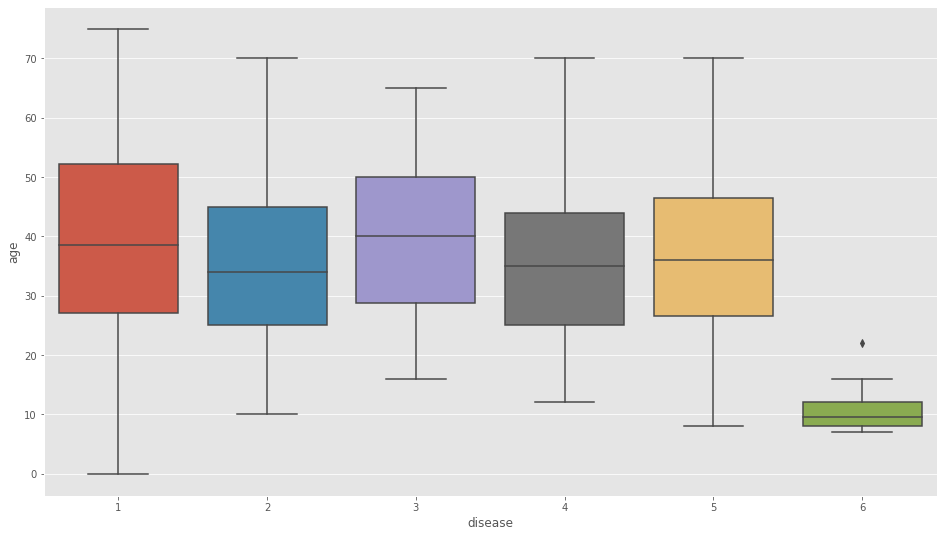

In [76]:
plt.figure(figsize=(16,9))
sns.boxplot(x='disease', y='age', data=data);

Note:
- 1 - psoriasis data distribution from age 0 to 75
- 2 - seborrheic dermatitis data distribution from age 10 to 70
- 3 - lichen planus data distribution from age 16 to 65
- 4 - pityriasis rosea data distribution from age 12 to 70
- 5 - cronic dermatitis data distribution from age 8 to 70
- 6 - pityriasis rubra pilaris data distribution from age 7 to 22.

Summary:
- The number 6 box plot is comparatively short. This suggests that overall age have a high level of agreement with each other.
- The number 1 box plots is comparatively tall. This suggests age hold quite different opinions about this aspect or sub-aspect.
- The number 2,4 & 5 box plots are much higher than number 6 and lower than number 1. These boxplot have the approx same median across
- The number 3 box plot is comparatively medium as compared to the other.

Conclusion:
- We may not surely say that the age is a good indicator of disease as the disease is mainly causes of saveral factors like human life style, food consumption, weather, cosmestic products & genetics

# SELECT ORDINAL FEATURES

In [77]:
col = ['erythema', 'scaling', 'definite_borders', 'itching',
       'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
       'oral_mucosal_involvement', 'knee_and_elbow_involvement',
       'scalp_involvement', 'melanin_incontinence',
       'eosinophils_in_the_infiltrate', 'pnl_infiltrate',
       'fibrosis_of_the_papillary_dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing_of_the_rete_ridges',
       'elongation_of_the_rete_ridges',
       'thinning_of_the_suprapapillary_epidermis', 'spongiform_pustule',
       'munro_microabcess', 'focal_hypergranulosis',
       'disappearance_of_the_granular_layer',
       'vacuolisation_and_damage_of_basal_layer', 'spongiosis',
       'saw-tooth_appearance_of_retes', 'follicular_horn_plug',
       'perifollicular_parakeratosis', 'inflammatory_monoluclear_inflitrate',
       'band-like_infiltrate']

# CONTINGENCY TABLE: DISEASE VS EACH ORDINAL FEATURE

In [78]:
for i in col:
    display(data.groupby(['disease',i])[i].agg('count').unstack().fillna(0))
    print('-'*100)

erythema,0,1,2,3
disease,,,,
1,1.0,7.0,63.0,41.0
2,0.0,5.0,34.0,22.0
3,1.0,7.0,49.0,15.0
4,0.0,11.0,32.0,6.0
5,2.0,25.0,22.0,3.0
6,0.0,2.0,15.0,3.0


----------------------------------------------------------------------------------------------------


scaling,0,1,2,3
disease,,,,
1,0.0,13.0,64.0,35.0
2,0.0,7.0,43.0,11.0
3,2.0,28.0,37.0,5.0
4,0.0,24.0,25.0,0.0
5,6.0,34.0,11.0,1.0
6,0.0,5.0,15.0,0.0


----------------------------------------------------------------------------------------------------


definite_borders,0,1,2,3
disease,,,,
1,0.0,14.0,73.0,25.0
2,21.0,22.0,18.0,0.0
3,1.0,10.0,42.0,19.0
4,9.0,22.0,18.0,0.0
5,23.0,16.0,11.0,2.0
6,5.0,9.0,6.0,0.0


----------------------------------------------------------------------------------------------------


itching,0,1,2,3
disease,,,,
1,55.0,22.0,21.0,14.0
2,9.0,16.0,25.0,11.0
3,2.0,9.0,28.0,33.0
4,33.0,10.0,5.0,1.0
5,8.0,7.0,20.0,17.0
6,11.0,8.0,1.0,0.0


----------------------------------------------------------------------------------------------------


koebner_phenomenon,0,1,2,3
disease,,,,
1,63.0,27.0,18.0,4.0
2,60.0,0.0,1.0,0.0
3,20.0,18.0,23.0,11.0
4,9.0,25.0,12.0,3.0
5,52.0,0.0,0.0,0.0
6,20.0,0.0,0.0,0.0


----------------------------------------------------------------------------------------------------


polygonal_papules,0,1,2,3
disease,,,,
1,112.0,0.0,0.0,0.0
2,61.0,0.0,0.0,0.0
3,3.0,1.0,41.0,27.0
4,49.0,0.0,0.0,0.0
5,52.0,0.0,0.0,0.0
6,20.0,0.0,0.0,0.0


----------------------------------------------------------------------------------------------------


follicular_papules,0,1,2,3
disease,,,,
1,109.0,2.0,1.0,0.0
2,60.0,1.0,0.0,0.0
3,72.0,0.0,0.0,0.0
4,49.0,0.0,0.0,0.0
5,43.0,6.0,3.0,0.0
6,0.0,2.0,12.0,6.0


----------------------------------------------------------------------------------------------------


oral_mucosal_involvement,0,1,2,3
disease,,,,
1,112.0,0.0,0.0,0.0
2,61.0,0.0,0.0,0.0
3,5.0,9.0,45.0,13.0
4,49.0,0.0,0.0,0.0
5,52.0,0.0,0.0,0.0
6,20.0,0.0,0.0,0.0


----------------------------------------------------------------------------------------------------


knee_and_elbow_involvement,0,1,2,3
disease,,,,
1,23.0,15.0,54.0,20.0
2,57.0,4.0,0.0,0.0
3,71.0,0.0,1.0,0.0
4,49.0,0.0,0.0,0.0
5,50.0,2.0,0.0,0.0
6,1.0,7.0,9.0,3.0


----------------------------------------------------------------------------------------------------


scalp_involvement,0,1,2,3
disease,,,,
1,23.0,23.0,50.0,16.0
2,56.0,3.0,2.0,0.0
3,70.0,2.0,0.0,0.0
4,49.0,0.0,0.0,0.0
5,52.0,0.0,0.0,0.0
6,14.0,2.0,4.0,0.0


----------------------------------------------------------------------------------------------------


melanin_incontinence,0,1,2,3
disease,,,,
1,112.0,0.0,0.0,0.0
2,61.0,0.0,0.0,0.0
3,2.0,8.0,46.0,16.0
4,49.0,0.0,0.0,0.0
5,52.0,0.0,0.0,0.0
6,20.0,0.0,0.0,0.0


----------------------------------------------------------------------------------------------------


eosinophils_in_the_infiltrate,0,1,2
disease,,,
1,109.0,2.0,1.0
2,39.0,16.0,6.0
3,62.0,8.0,2.0
4,46.0,3.0,0.0
5,48.0,4.0,0.0
6,20.0,0.0,0.0


----------------------------------------------------------------------------------------------------


pnl_infiltrate,0,1,2,3
disease,,,,
1,34.0,37.0,35.0,6.0
2,17.0,23.0,20.0,1.0
3,72.0,0.0,0.0,0.0
4,43.0,6.0,0.0,0.0
5,52.0,0.0,0.0,0.0
6,17.0,3.0,0.0,0.0


----------------------------------------------------------------------------------------------------


fibrosis_of_the_papillary_dermis,0,1,2,3
disease,,,,
1,112.0,0.0,0.0,0.0
2,61.0,0.0,0.0,0.0
3,70.0,0.0,2.0,0.0
4,49.0,0.0,0.0,0.0
5,0.0,8.0,21.0,23.0
6,20.0,0.0,0.0,0.0


----------------------------------------------------------------------------------------------------


exocytosis,0,1,2,3
disease,,,,
1,93.0,8.0,11.0,0.0
2,1.0,7.0,32.0,21.0
3,1.0,6.0,38.0,27.0
4,1.0,8.0,28.0,12.0
5,20.0,20.0,12.0,0.0
6,2.0,8.0,8.0,2.0


----------------------------------------------------------------------------------------------------


acanthosis,0,1,2,3
disease,,,,
1,1.0,14.0,70.0,27.0
2,4.0,14.0,35.0,8.0
3,1.0,9.0,43.0,19.0
4,4.0,19.0,26.0,0.0
5,0.0,7.0,25.0,20.0
6,0.0,8.0,11.0,1.0


----------------------------------------------------------------------------------------------------


hyperkeratosis,0,1,2,3
disease,,,,
1,53.0,30.0,25.0,4.0
2,50.0,10.0,0.0,1.0
3,54.0,15.0,3.0,0.0
4,37.0,9.0,3.0,0.0
5,27.0,14.0,11.0,0.0
6,6.0,12.0,2.0,0.0


----------------------------------------------------------------------------------------------------


parakeratosis,0,1,2,3
disease,,,,
1,1.0,20.0,69.0,22.0
2,24.0,17.0,17.0,3.0
3,15.0,32.0,20.0,5.0
4,17.0,27.0,5.0,0.0
5,27.0,11.0,14.0,0.0
6,2.0,11.0,7.0,0.0


----------------------------------------------------------------------------------------------------


clubbing_of_the_rete_ridges,0,1,2,3
disease,,,,
1,3.0,15.0,60.0,34.0
2,61.0,0.0,0.0,0.0
3,72.0,0.0,0.0,0.0
4,49.0,0.0,0.0,0.0
5,49.0,2.0,1.0,0.0
6,18.0,2.0,0.0,0.0


----------------------------------------------------------------------------------------------------


elongation_of_the_rete_ridges,0,1,2,3
disease,,,,
1,0.0,11.0,61.0,40.0
2,54.0,4.0,3.0,0.0
3,72.0,0.0,0.0,0.0
4,49.0,0.0,0.0,0.0
5,5.0,6.0,31.0,10.0
6,18.0,2.0,0.0,0.0


----------------------------------------------------------------------------------------------------


thinning_of_the_suprapapillary_epidermis,0,1,2,3
disease,,,,
1,4.0,17.0,60.0,31.0
2,60.0,1.0,0.0,0.0
3,72.0,0.0,0.0,0.0
4,49.0,0.0,0.0,0.0
5,51.0,1.0,0.0,0.0
6,20.0,0.0,0.0,0.0


----------------------------------------------------------------------------------------------------


spongiform_pustule,0,1,2,3
disease,,,,
1,52.0,30.0,24.0,6.0
2,53.0,6.0,2.0,0.0
3,72.0,0.0,0.0,0.0
4,49.0,0.0,0.0,0.0
5,51.0,1.0,0.0,0.0
6,19.0,1.0,0.0,0.0


----------------------------------------------------------------------------------------------------


munro_microabcess,0,1,2,3
disease,,,,
1,34.0,36.0,33.0,9.0
2,61.0,0.0,0.0,0.0
3,71.0,0.0,0.0,1.0
4,48.0,1.0,0.0,0.0
5,52.0,0.0,0.0,0.0
6,20.0,0.0,0.0,0.0


----------------------------------------------------------------------------------------------------


focal_hypergranulosis,0,1,2,3
disease,,,,
1,112.0,0.0,0.0,0.0
2,61.0,0.0,0.0,0.0
3,2.0,12.0,43.0,15.0
4,49.0,0.0,0.0,0.0
5,52.0,0.0,0.0,0.0
6,19.0,1.0,0.0,0.0


----------------------------------------------------------------------------------------------------


disappearance_of_the_granular_layer,0,1,2,3
disease,,,,
1,46.0,12.0,40.0,14.0
2,61.0,0.0,0.0,0.0
3,63.0,1.0,8.0,0.0
4,31.0,17.0,1.0,0.0
5,52.0,0.0,0.0,0.0
6,20.0,0.0,0.0,0.0


----------------------------------------------------------------------------------------------------


vacuolisation_and_damage_of_basal_layer,0,1,2,3
disease,,,,
1,111.0,1.0,0.0,0.0
2,61.0,0.0,0.0,0.0
3,1.0,2.0,43.0,26.0
4,49.0,0.0,0.0,0.0
5,52.0,0.0,0.0,0.0
6,20.0,0.0,0.0,0.0


----------------------------------------------------------------------------------------------------


spongiosis,0,1,2,3
disease,,,,
1,112.0,0.0,0.0,0.0
2,4.0,2.0,35.0,20.0
3,35.0,6.0,20.0,11.0
4,2.0,7.0,31.0,9.0
5,40.0,7.0,4.0,1.0
6,6.0,6.0,6.0,2.0


----------------------------------------------------------------------------------------------------


saw-tooth_appearance_of_retes,0,1,2,3
disease,,,,
1,112.0,0.0,0.0,0.0
2,61.0,0.0,0.0,0.0
3,1.0,4.0,40.0,27.0
4,48.0,1.0,0.0,0.0
5,52.0,0.0,0.0,0.0
6,20.0,0.0,0.0,0.0


----------------------------------------------------------------------------------------------------


follicular_horn_plug,0,1,2,3
disease,,,,
1,112.0,0.0,0.0,0.0
2,60.0,1.0,0.0,0.0
3,71.0,1.0,0.0,0.0
4,49.0,0.0,0.0,0.0
5,51.0,1.0,0.0,0.0
6,1.0,7.0,8.0,4.0


----------------------------------------------------------------------------------------------------


perifollicular_parakeratosis,0,1,2,3
disease,,,,
1,112.0,0.0,0.0,0.0
2,60.0,1.0,0.0,0.0
3,72.0,0.0,0.0,0.0
4,49.0,0.0,0.0,0.0
5,52.0,0.0,0.0,0.0
6,0.0,3.0,13.0,4.0


----------------------------------------------------------------------------------------------------


inflammatory_monoluclear_inflitrate,0,1,2,3
disease,,,,
1,5,22,68,17
2,4,23,27,7
3,1,3,45,23
4,1,13,31,4
5,1,17,24,10
6,1,7,11,1


----------------------------------------------------------------------------------------------------


band-like_infiltrate,0,1,2,3
disease,,,,
1,110.0,1.0,1.0,0.0
2,60.0,0.0,1.0,0.0
3,0.0,0.0,20.0,52.0
4,49.0,0.0,0.0,0.0
5,51.0,1.0,0.0,0.0
6,19.0,1.0,0.0,0.0


----------------------------------------------------------------------------------------------------


In [99]:
for i in col:
    display((data[['disease',i]].value_counts(normalize=True)*100).unstack().fillna(0).style.highlight_max(axis=1))
    print('-'*100)

erythema,0,1,2,3
disease,,,,
1,0.273224,1.912568,17.213115,11.202186
2,0.000000,1.366120,9.289617,6.010929
3,0.273224,1.912568,13.387978,4.098361
4,0.000000,3.005464,8.743169,1.639344
5,0.546448,6.830601,6.010929,0.819672
6,0.000000,0.546448,4.098361,0.819672


----------------------------------------------------------------------------------------------------


scaling,0,1,2,3
disease,,,,
1,0.000000,3.551913,17.486339,9.562842
2,0.000000,1.912568,11.748634,3.005464
3,0.546448,7.650273,10.109290,1.366120
4,0.000000,6.557377,6.830601,0.000000
5,1.639344,9.289617,3.005464,0.273224
6,0.000000,1.366120,4.098361,0.000000


----------------------------------------------------------------------------------------------------


definite_borders,0,1,2,3
disease,,,,
1,0.000000,3.825137,19.945355,6.830601
2,5.737705,6.010929,4.918033,0.000000
3,0.273224,2.732240,11.475410,5.191257
4,2.459016,6.010929,4.918033,0.000000
5,6.284153,4.371585,3.005464,0.546448
6,1.366120,2.459016,1.639344,0.000000


----------------------------------------------------------------------------------------------------


itching,0,1,2,3
disease,,,,
1,15.027322,6.010929,5.737705,3.825137
2,2.459016,4.371585,6.830601,3.005464
3,0.546448,2.459016,7.650273,9.016393
4,9.016393,2.732240,1.366120,0.273224
5,2.185792,1.912568,5.464481,4.644809
6,3.005464,2.185792,0.273224,0.000000


----------------------------------------------------------------------------------------------------


koebner_phenomenon,0,1,2,3
disease,,,,
1,17.213115,7.377049,4.918033,1.092896
2,16.393443,0.000000,0.273224,0.000000
3,5.464481,4.918033,6.284153,3.005464
4,2.459016,6.830601,3.278689,0.819672
5,14.207650,0.000000,0.000000,0.000000
6,5.464481,0.000000,0.000000,0.000000


----------------------------------------------------------------------------------------------------


polygonal_papules,0,1,2,3
disease,,,,
1,30.601093,0.000000,0.000000,0.000000
2,16.666667,0.000000,0.000000,0.000000
3,0.819672,0.273224,11.202186,7.377049
4,13.387978,0.000000,0.000000,0.000000
5,14.207650,0.000000,0.000000,0.000000
6,5.464481,0.000000,0.000000,0.000000


----------------------------------------------------------------------------------------------------


follicular_papules,0,1,2,3
disease,,,,
1,29.781421,0.546448,0.273224,0.000000
2,16.393443,0.273224,0.000000,0.000000
3,19.672131,0.000000,0.000000,0.000000
4,13.387978,0.000000,0.000000,0.000000
5,11.748634,1.639344,0.819672,0.000000
6,0.000000,0.546448,3.278689,1.639344


----------------------------------------------------------------------------------------------------


oral_mucosal_involvement,0,1,2,3
disease,,,,
1,30.601093,0.000000,0.000000,0.000000
2,16.666667,0.000000,0.000000,0.000000
3,1.366120,2.459016,12.295082,3.551913
4,13.387978,0.000000,0.000000,0.000000
5,14.207650,0.000000,0.000000,0.000000
6,5.464481,0.000000,0.000000,0.000000


----------------------------------------------------------------------------------------------------


knee_and_elbow_involvement,0,1,2,3
disease,,,,
1,6.284153,4.098361,14.754098,5.464481
2,15.573770,1.092896,0.000000,0.000000
3,19.398907,0.000000,0.273224,0.000000
4,13.387978,0.000000,0.000000,0.000000
5,13.661202,0.546448,0.000000,0.000000
6,0.273224,1.912568,2.459016,0.819672


----------------------------------------------------------------------------------------------------


scalp_involvement,0,1,2,3
disease,,,,
1,6.284153,6.284153,13.661202,4.371585
2,15.300546,0.819672,0.546448,0.000000
3,19.125683,0.546448,0.000000,0.000000
4,13.387978,0.000000,0.000000,0.000000
5,14.207650,0.000000,0.000000,0.000000
6,3.825137,0.546448,1.092896,0.000000


----------------------------------------------------------------------------------------------------


melanin_incontinence,0,1,2,3
disease,,,,
1,30.601093,0.000000,0.000000,0.000000
2,16.666667,0.000000,0.000000,0.000000
3,0.546448,2.185792,12.568306,4.371585
4,13.387978,0.000000,0.000000,0.000000
5,14.207650,0.000000,0.000000,0.000000
6,5.464481,0.000000,0.000000,0.000000


----------------------------------------------------------------------------------------------------


eosinophils_in_the_infiltrate,0,1,2
disease,,,
1,29.781421,0.546448,0.273224
2,10.655738,4.371585,1.639344
3,16.939891,2.185792,0.546448
4,12.568306,0.819672,0.000000
5,13.114754,1.092896,0.000000
6,5.464481,0.000000,0.000000


----------------------------------------------------------------------------------------------------


pnl_infiltrate,0,1,2,3
disease,,,,
1,9.289617,10.109290,9.562842,1.639344
2,4.644809,6.284153,5.464481,0.273224
3,19.672131,0.000000,0.000000,0.000000
4,11.748634,1.639344,0.000000,0.000000
5,14.207650,0.000000,0.000000,0.000000
6,4.644809,0.819672,0.000000,0.000000


----------------------------------------------------------------------------------------------------


fibrosis_of_the_papillary_dermis,0,1,2,3
disease,,,,
1,30.601093,0.000000,0.000000,0.000000
2,16.666667,0.000000,0.000000,0.000000
3,19.125683,0.000000,0.546448,0.000000
4,13.387978,0.000000,0.000000,0.000000
5,0.000000,2.185792,5.737705,6.284153
6,5.464481,0.000000,0.000000,0.000000


----------------------------------------------------------------------------------------------------


exocytosis,0,1,2,3
disease,,,,
1,25.409836,2.185792,3.005464,0.000000
2,0.273224,1.912568,8.743169,5.737705
3,0.273224,1.639344,10.382514,7.377049
4,0.273224,2.185792,7.650273,3.278689
5,5.464481,5.464481,3.278689,0.000000
6,0.546448,2.185792,2.185792,0.546448


----------------------------------------------------------------------------------------------------


acanthosis,0,1,2,3
disease,,,,
1,0.273224,3.825137,19.125683,7.377049
2,1.092896,3.825137,9.562842,2.185792
3,0.273224,2.459016,11.748634,5.191257
4,1.092896,5.191257,7.103825,0.000000
5,0.000000,1.912568,6.830601,5.464481
6,0.000000,2.185792,3.005464,0.273224


----------------------------------------------------------------------------------------------------


hyperkeratosis,0,1,2,3
disease,,,,
1,14.480874,8.196721,6.830601,1.092896
2,13.661202,2.732240,0.000000,0.273224
3,14.754098,4.098361,0.819672,0.000000
4,10.109290,2.459016,0.819672,0.000000
5,7.377049,3.825137,3.005464,0.000000
6,1.639344,3.278689,0.546448,0.000000


----------------------------------------------------------------------------------------------------


parakeratosis,0,1,2,3
disease,,,,
1,0.273224,5.464481,18.852459,6.010929
2,6.557377,4.644809,4.644809,0.819672
3,4.098361,8.743169,5.464481,1.366120
4,4.644809,7.377049,1.366120,0.000000
5,7.377049,3.005464,3.825137,0.000000
6,0.546448,3.005464,1.912568,0.000000


----------------------------------------------------------------------------------------------------


clubbing_of_the_rete_ridges,0,1,2,3
disease,,,,
1,0.819672,4.098361,16.393443,9.289617
2,16.666667,0.000000,0.000000,0.000000
3,19.672131,0.000000,0.000000,0.000000
4,13.387978,0.000000,0.000000,0.000000
5,13.387978,0.546448,0.273224,0.000000
6,4.918033,0.546448,0.000000,0.000000


----------------------------------------------------------------------------------------------------


elongation_of_the_rete_ridges,0,1,2,3
disease,,,,
1,0.000000,3.005464,16.666667,10.928962
2,14.754098,1.092896,0.819672,0.000000
3,19.672131,0.000000,0.000000,0.000000
4,13.387978,0.000000,0.000000,0.000000
5,1.366120,1.639344,8.469945,2.732240
6,4.918033,0.546448,0.000000,0.000000


----------------------------------------------------------------------------------------------------


thinning_of_the_suprapapillary_epidermis,0,1,2,3
disease,,,,
1,1.092896,4.644809,16.393443,8.469945
2,16.393443,0.273224,0.000000,0.000000
3,19.672131,0.000000,0.000000,0.000000
4,13.387978,0.000000,0.000000,0.000000
5,13.934426,0.273224,0.000000,0.000000
6,5.464481,0.000000,0.000000,0.000000


----------------------------------------------------------------------------------------------------


spongiform_pustule,0,1,2,3
disease,,,,
1,14.207650,8.196721,6.557377,1.639344
2,14.480874,1.639344,0.546448,0.000000
3,19.672131,0.000000,0.000000,0.000000
4,13.387978,0.000000,0.000000,0.000000
5,13.934426,0.273224,0.000000,0.000000
6,5.191257,0.273224,0.000000,0.000000


----------------------------------------------------------------------------------------------------


munro_microabcess,0,1,2,3
disease,,,,
1,9.289617,9.836066,9.016393,2.459016
2,16.666667,0.000000,0.000000,0.000000
3,19.398907,0.000000,0.000000,0.273224
4,13.114754,0.273224,0.000000,0.000000
5,14.207650,0.000000,0.000000,0.000000
6,5.464481,0.000000,0.000000,0.000000


----------------------------------------------------------------------------------------------------


focal_hypergranulosis,0,1,2,3
disease,,,,
1,30.601093,0.000000,0.000000,0.000000
2,16.666667,0.000000,0.000000,0.000000
3,0.546448,3.278689,11.748634,4.098361
4,13.387978,0.000000,0.000000,0.000000
5,14.207650,0.000000,0.000000,0.000000
6,5.191257,0.273224,0.000000,0.000000


----------------------------------------------------------------------------------------------------


disappearance_of_the_granular_layer,0,1,2,3
disease,,,,
1,12.568306,3.278689,10.928962,3.825137
2,16.666667,0.000000,0.000000,0.000000
3,17.213115,0.273224,2.185792,0.000000
4,8.469945,4.644809,0.273224,0.000000
5,14.207650,0.000000,0.000000,0.000000
6,5.464481,0.000000,0.000000,0.000000


----------------------------------------------------------------------------------------------------


vacuolisation_and_damage_of_basal_layer,0,1,2,3
disease,,,,
1,30.327869,0.273224,0.000000,0.000000
2,16.666667,0.000000,0.000000,0.000000
3,0.273224,0.546448,11.748634,7.103825
4,13.387978,0.000000,0.000000,0.000000
5,14.207650,0.000000,0.000000,0.000000
6,5.464481,0.000000,0.000000,0.000000


----------------------------------------------------------------------------------------------------


spongiosis,0,1,2,3
disease,,,,
1,30.601093,0.000000,0.000000,0.000000
2,1.092896,0.546448,9.562842,5.464481
3,9.562842,1.639344,5.464481,3.005464
4,0.546448,1.912568,8.469945,2.459016
5,10.928962,1.912568,1.092896,0.273224
6,1.639344,1.639344,1.639344,0.546448


----------------------------------------------------------------------------------------------------


saw-tooth_appearance_of_retes,0,1,2,3
disease,,,,
1,30.601093,0.000000,0.000000,0.000000
2,16.666667,0.000000,0.000000,0.000000
3,0.273224,1.092896,10.928962,7.377049
4,13.114754,0.273224,0.000000,0.000000
5,14.207650,0.000000,0.000000,0.000000
6,5.464481,0.000000,0.000000,0.000000


----------------------------------------------------------------------------------------------------


follicular_horn_plug,0,1,2,3
disease,,,,
1,30.601093,0.000000,0.000000,0.000000
2,16.393443,0.273224,0.000000,0.000000
3,19.398907,0.273224,0.000000,0.000000
4,13.387978,0.000000,0.000000,0.000000
5,13.934426,0.273224,0.000000,0.000000
6,0.273224,1.912568,2.185792,1.092896


----------------------------------------------------------------------------------------------------


perifollicular_parakeratosis,0,1,2,3
disease,,,,
1,30.601093,0.000000,0.000000,0.000000
2,16.393443,0.273224,0.000000,0.000000
3,19.672131,0.000000,0.000000,0.000000
4,13.387978,0.000000,0.000000,0.000000
5,14.207650,0.000000,0.000000,0.000000
6,0.000000,0.819672,3.551913,1.092896


----------------------------------------------------------------------------------------------------


inflammatory_monoluclear_inflitrate,0,1,2,3
disease,,,,
1,1.366120,6.010929,18.579235,4.644809
2,1.092896,6.284153,7.377049,1.912568
3,0.273224,0.819672,12.295082,6.284153
4,0.273224,3.551913,8.469945,1.092896
5,0.273224,4.644809,6.557377,2.732240
6,0.273224,1.912568,3.005464,0.273224


----------------------------------------------------------------------------------------------------


band-like_infiltrate,0,1,2,3
disease,,,,
1,30.054645,0.273224,0.273224,0.000000
2,16.393443,0.000000,0.273224,0.000000
3,0.000000,0.000000,5.464481,14.207650
4,13.387978,0.000000,0.000000,0.000000
5,13.934426,0.273224,0.000000,0.000000
6,5.191257,0.273224,0.000000,0.000000


----------------------------------------------------------------------------------------------------


# PLOT CONTINGENCY TABLE RESULTS

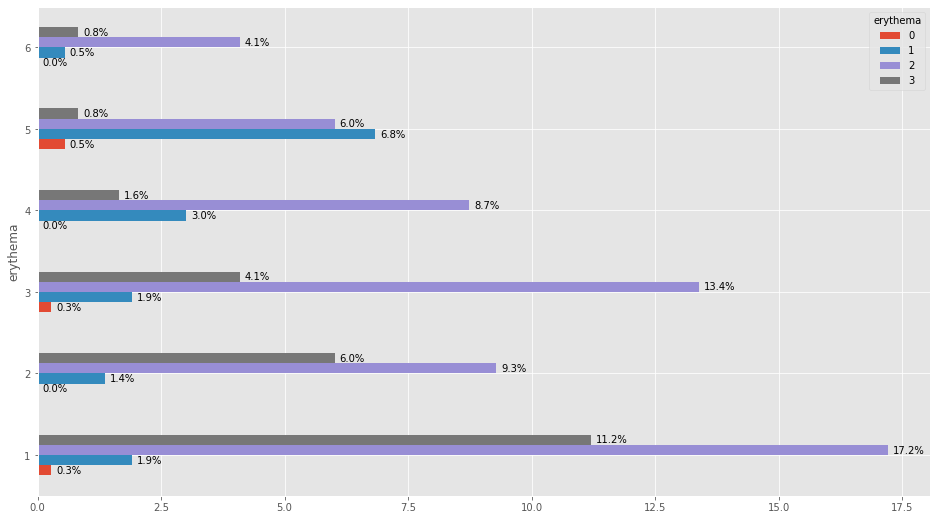

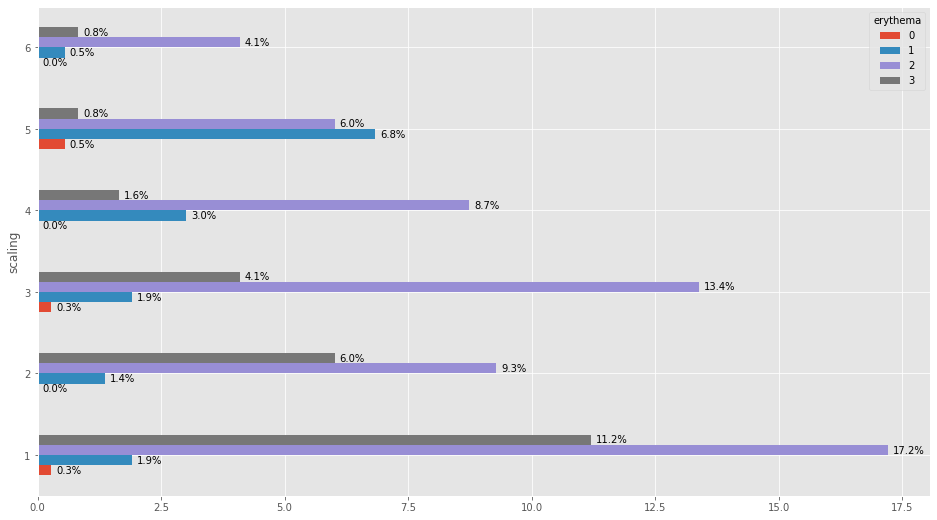

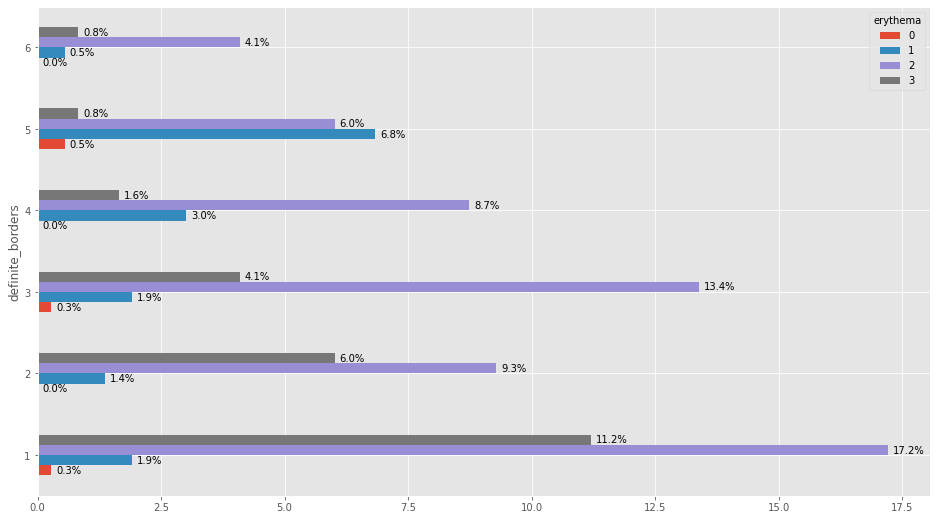

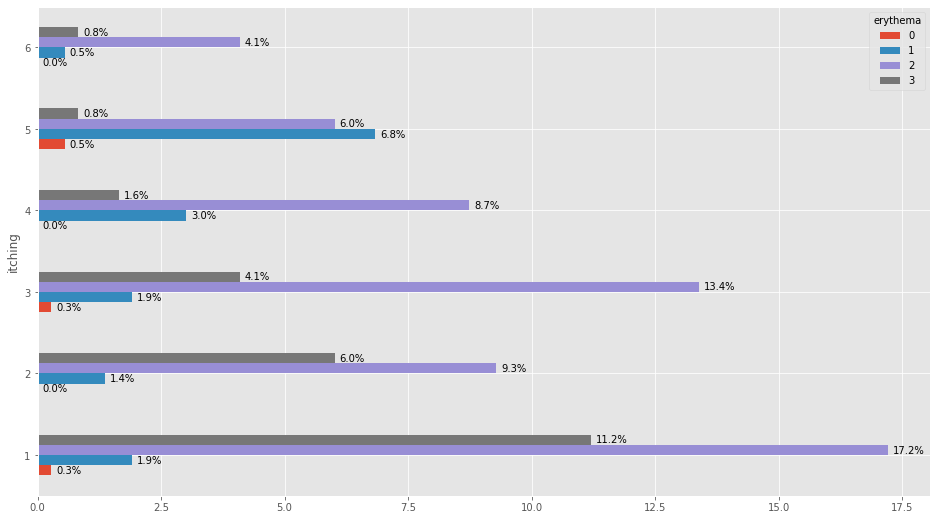

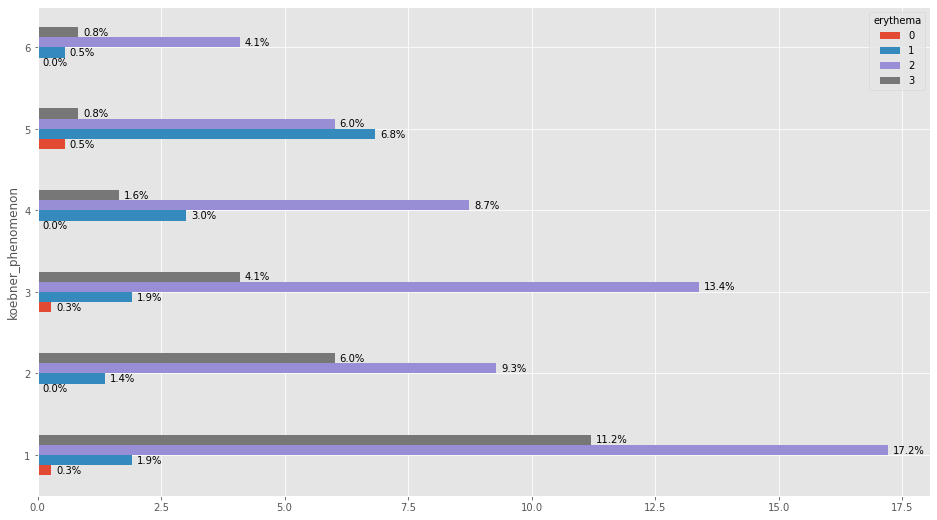

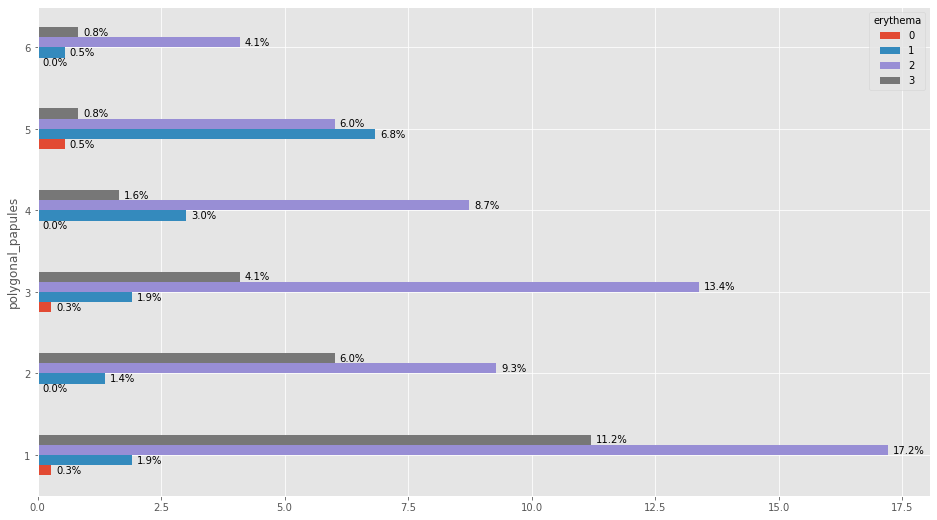

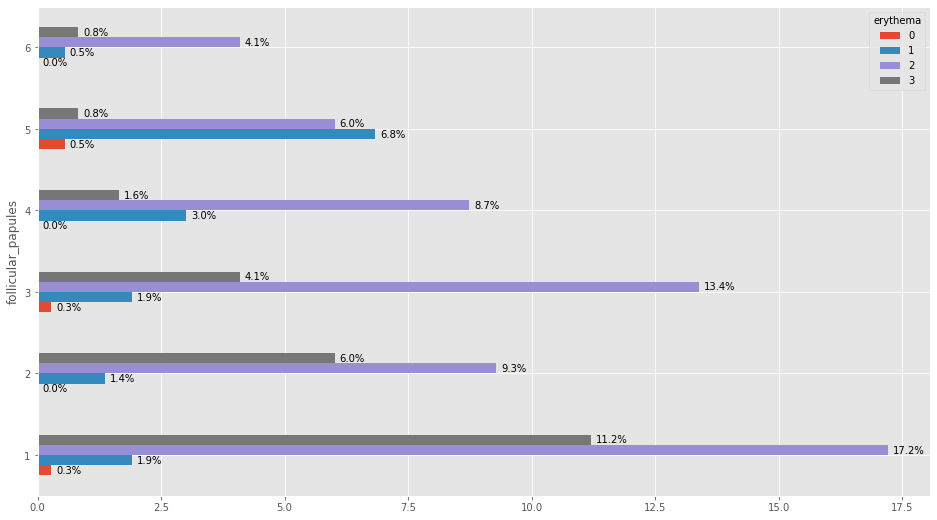

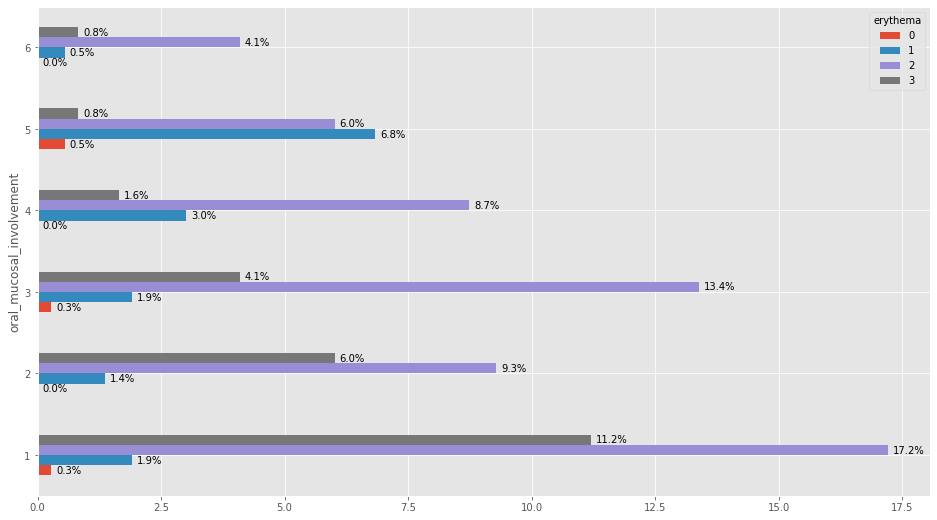

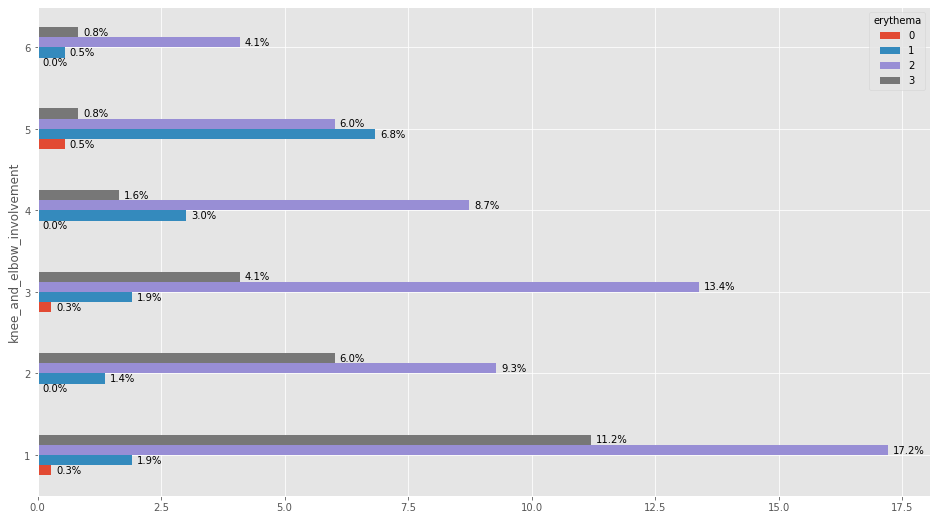

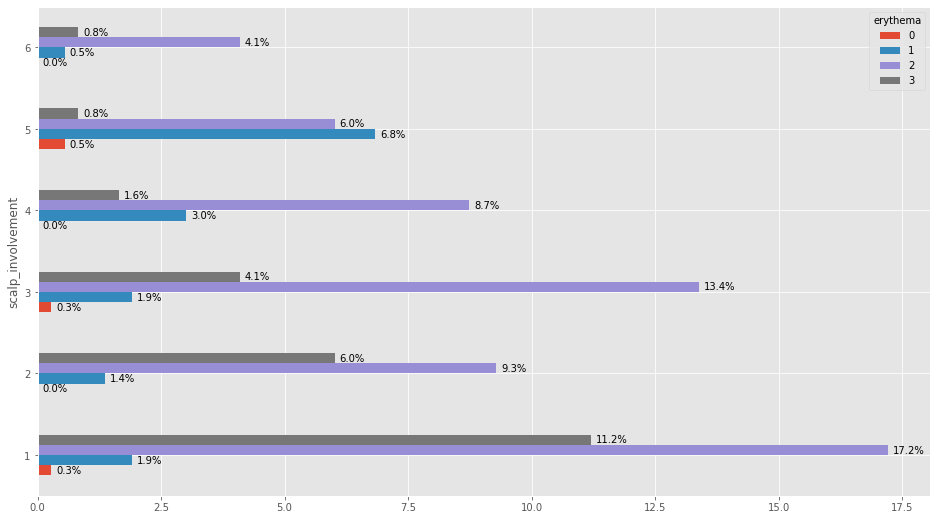

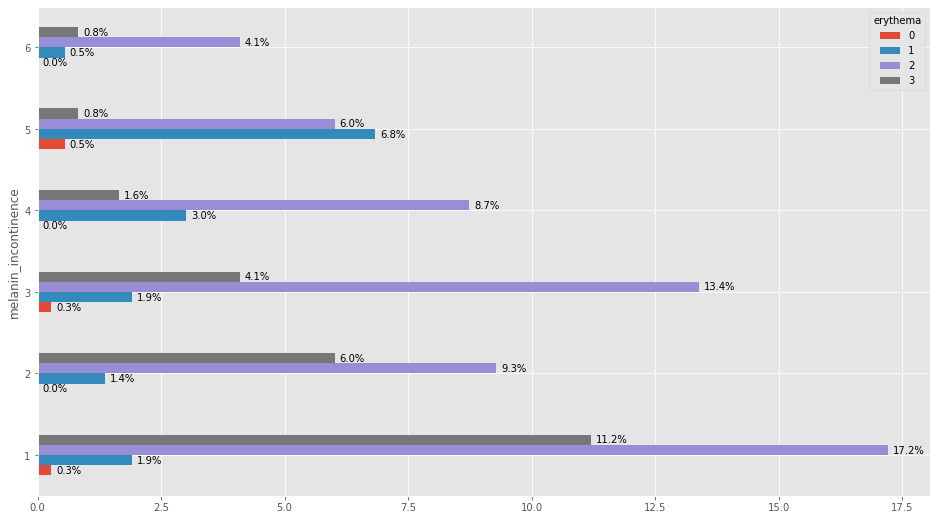

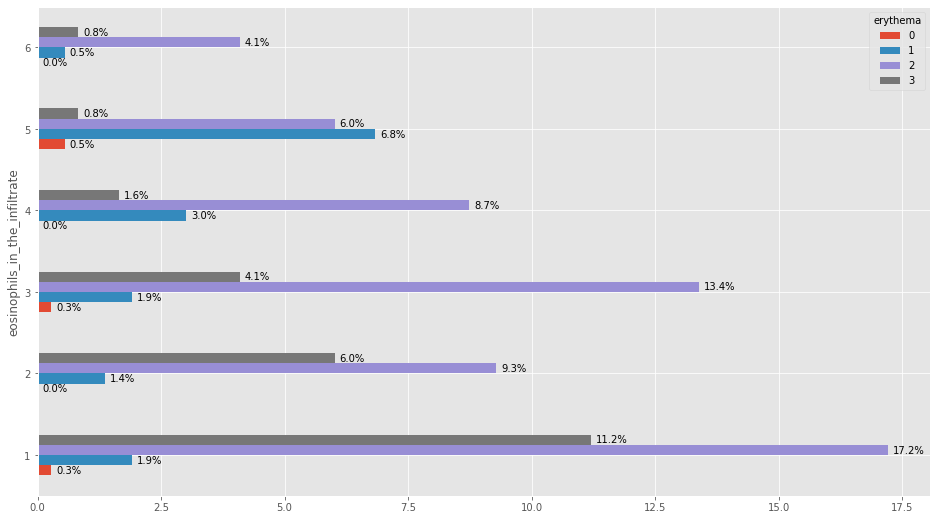

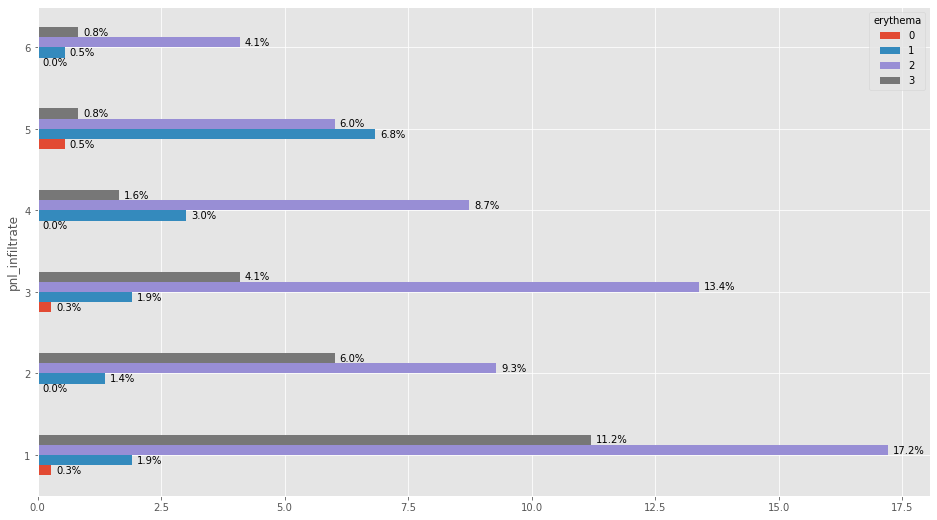

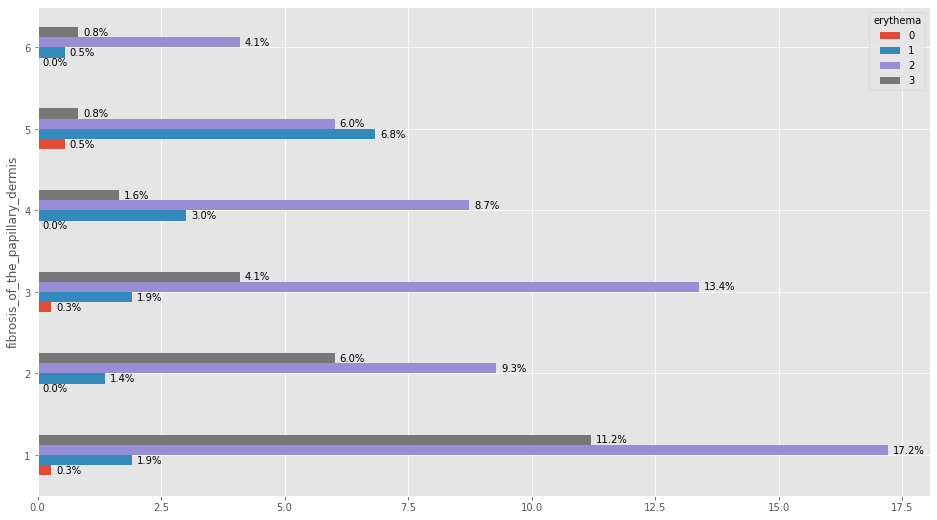

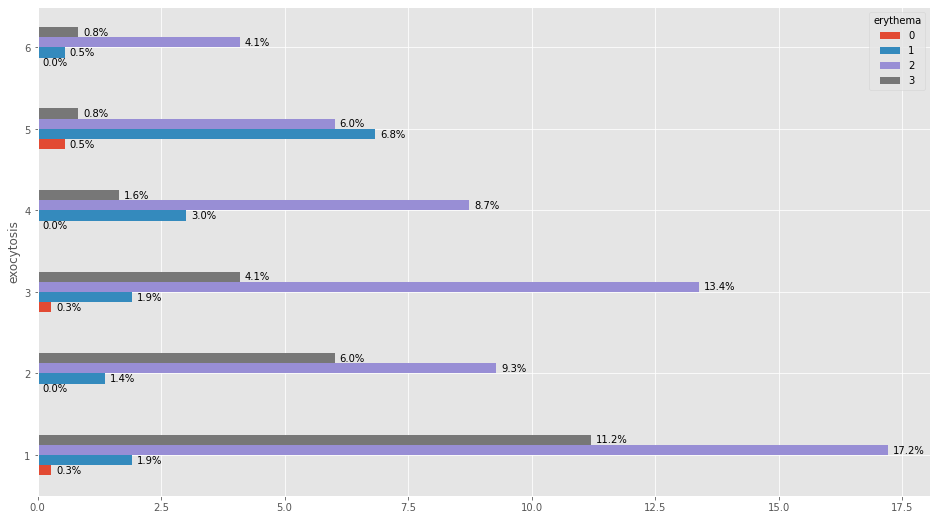

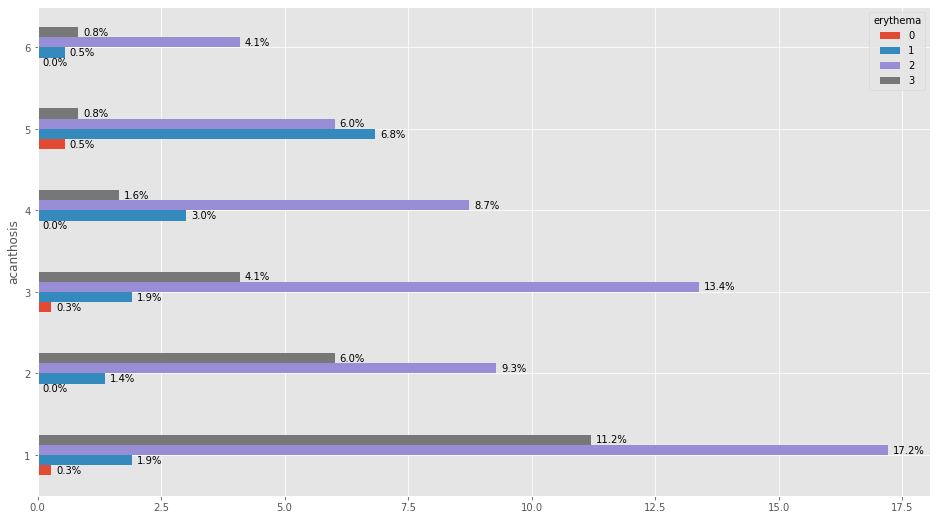

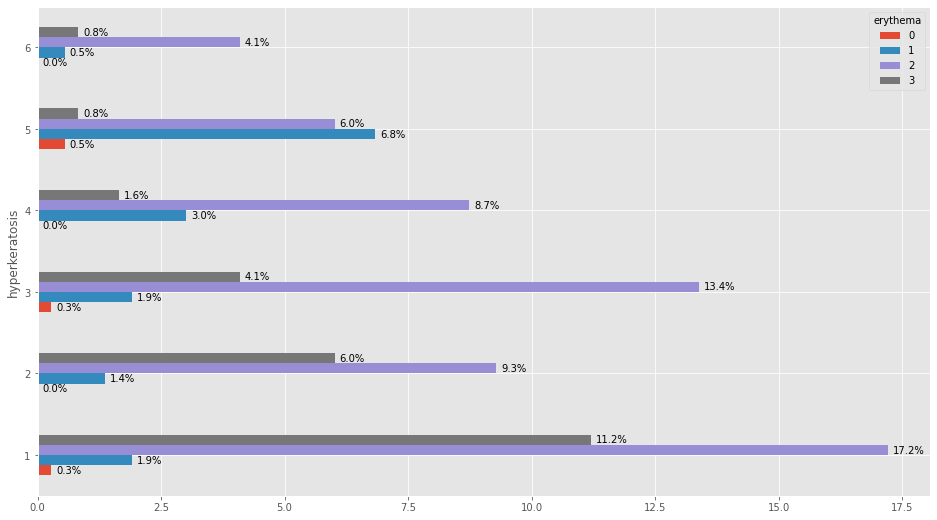

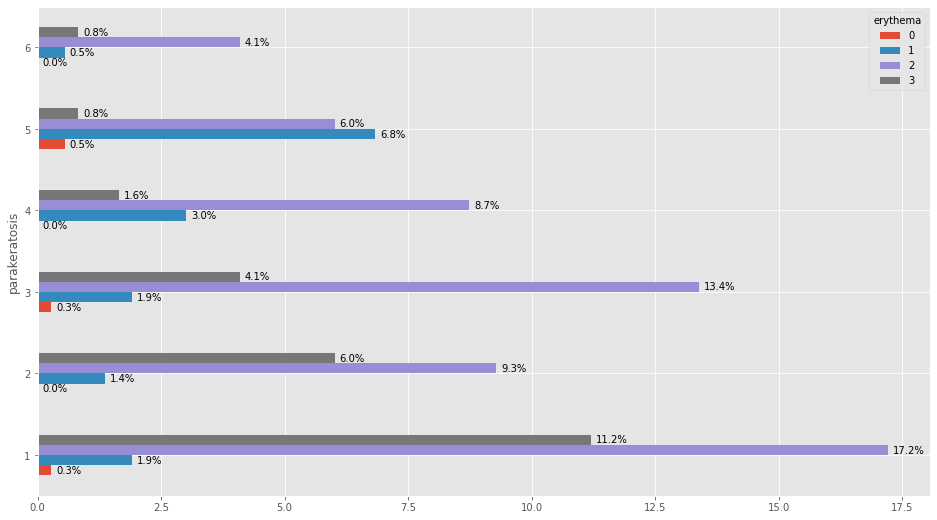

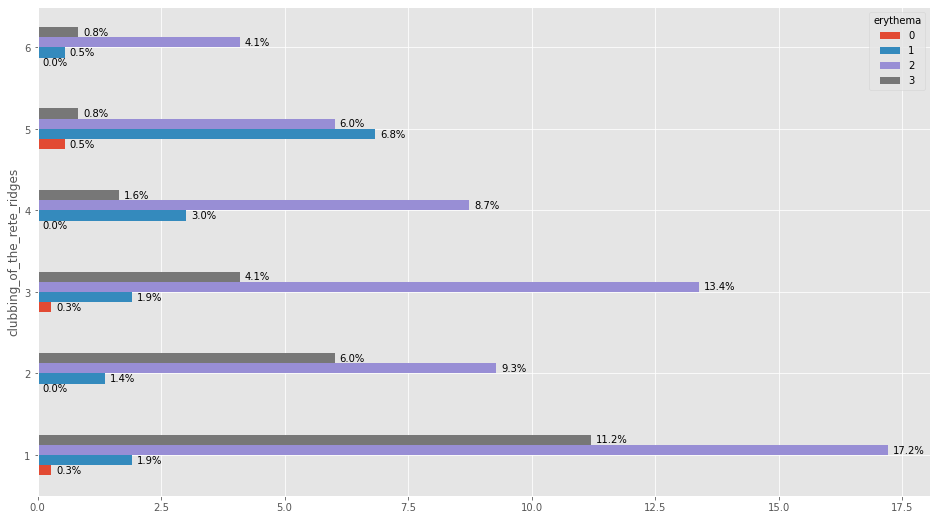

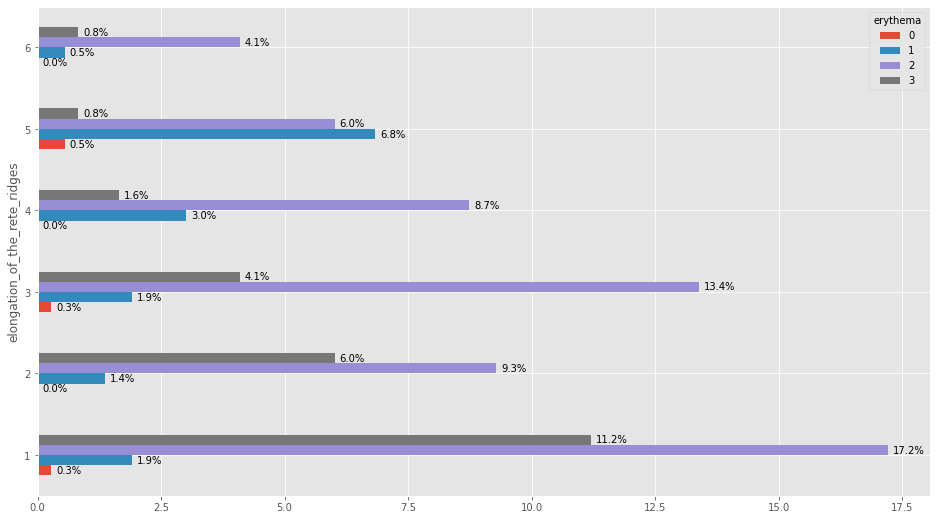

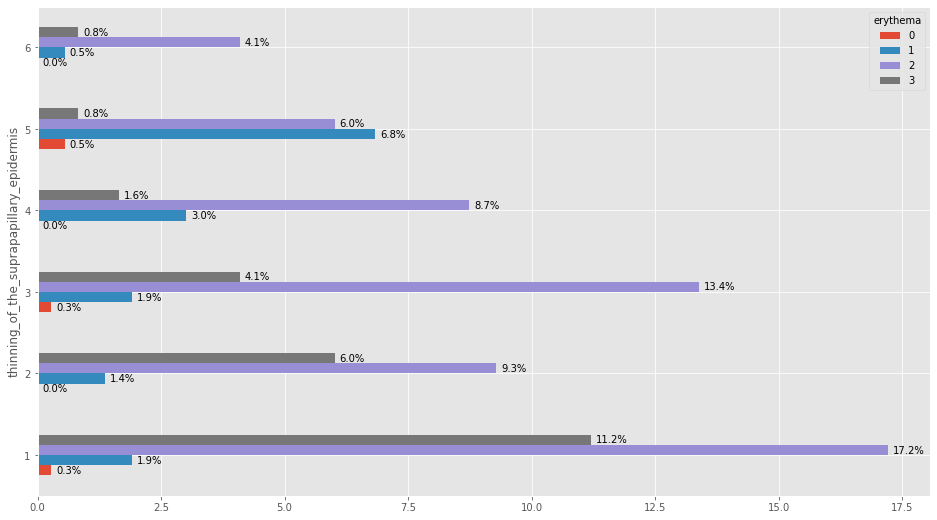

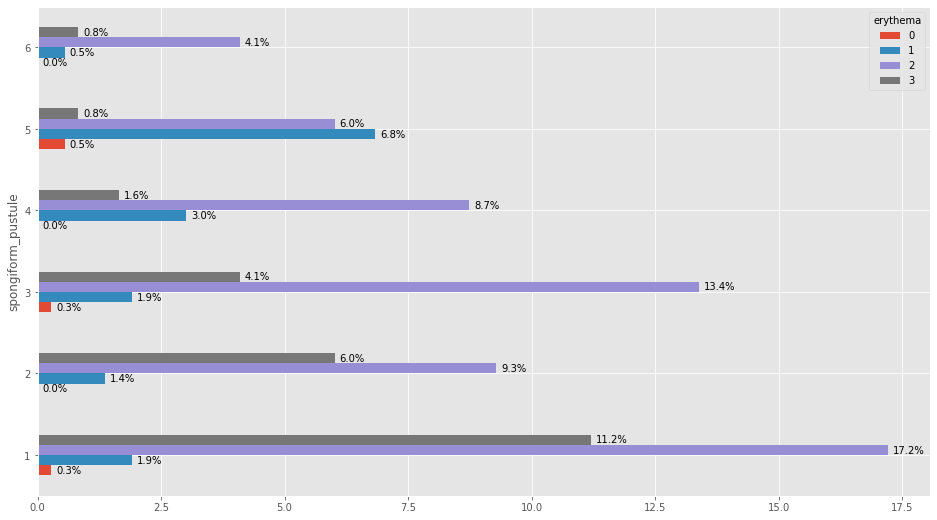

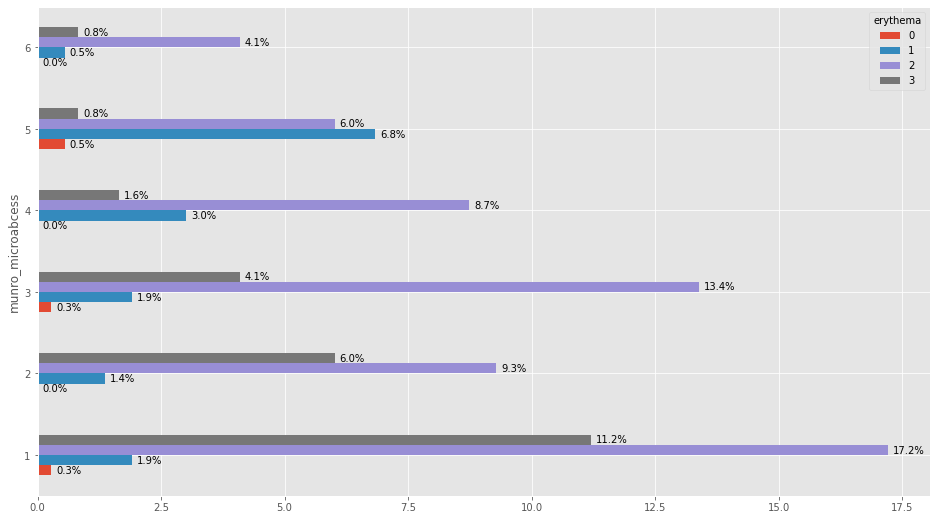

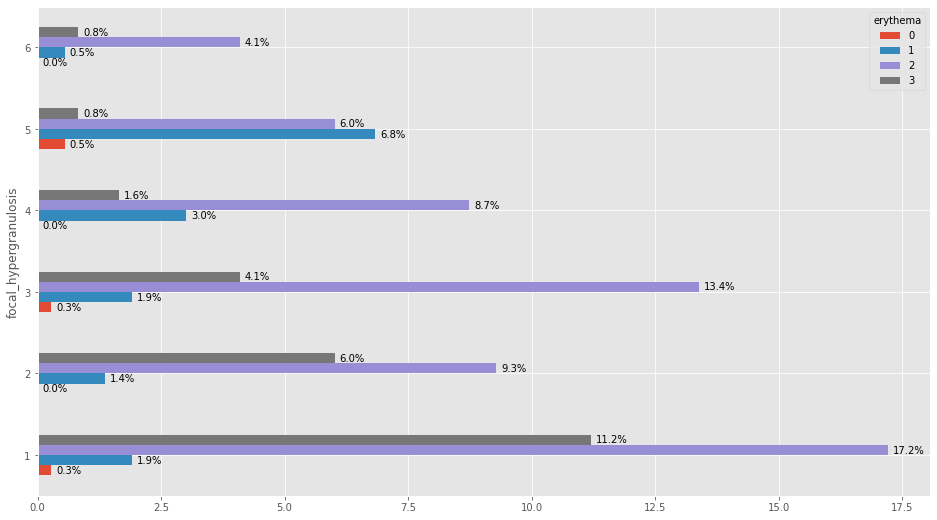

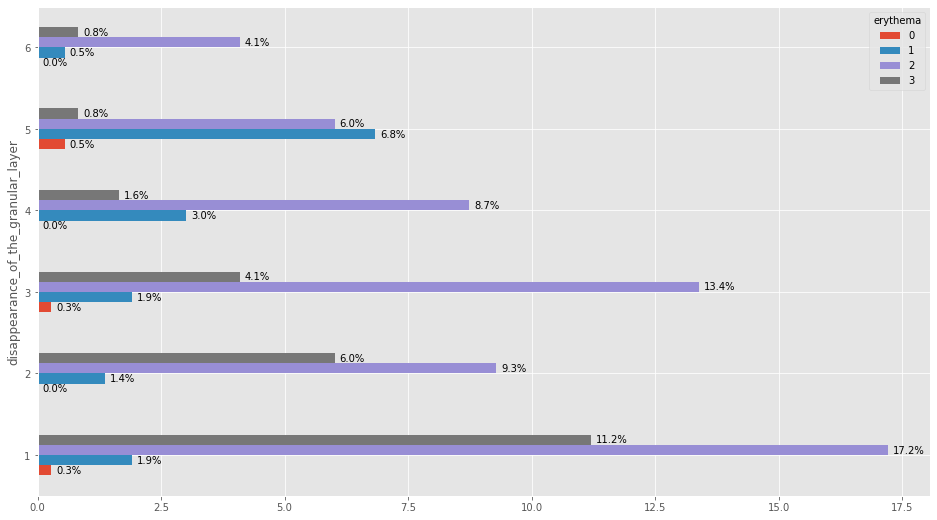

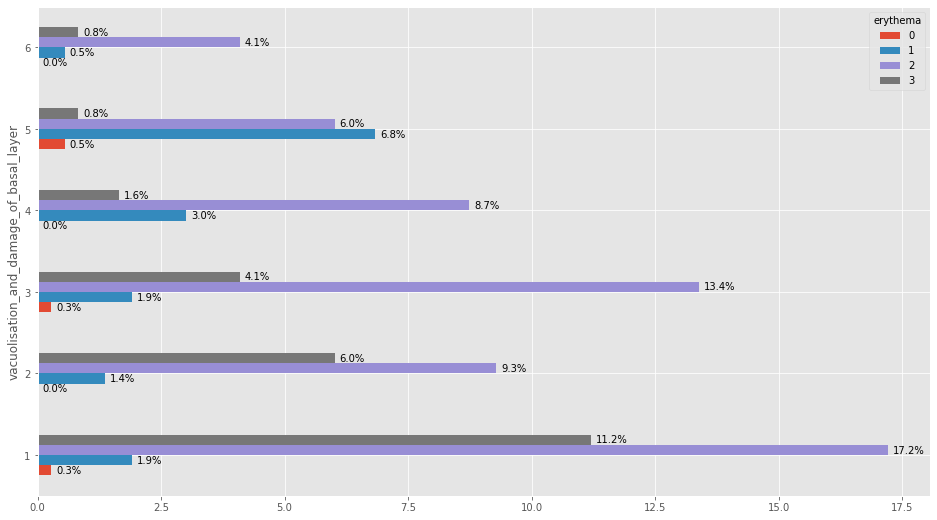

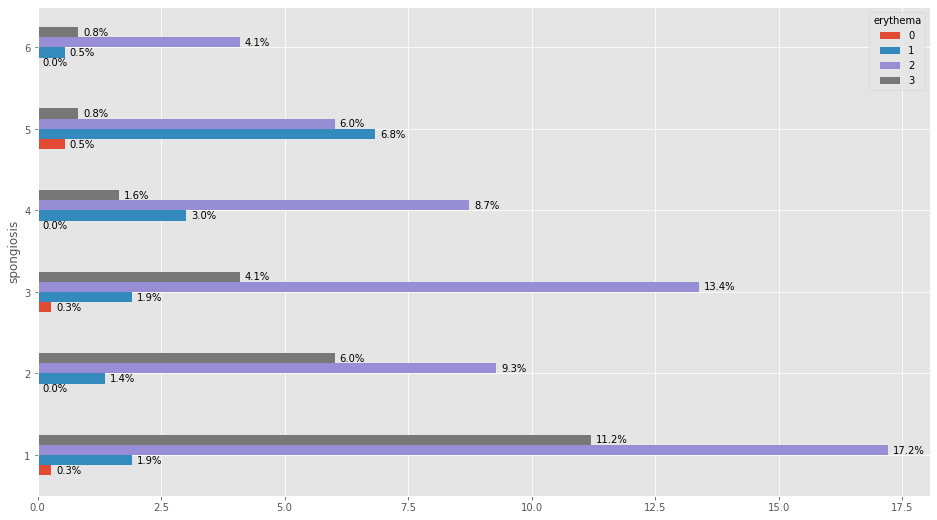

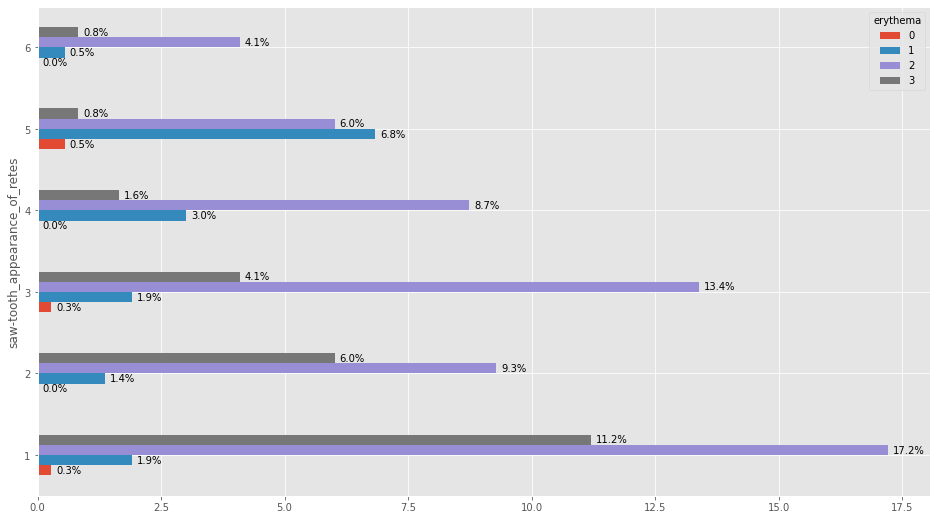

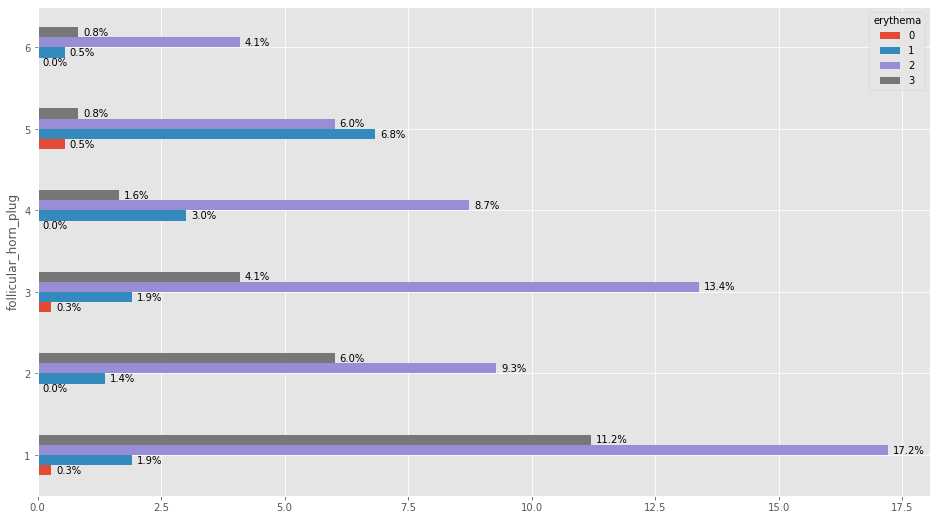

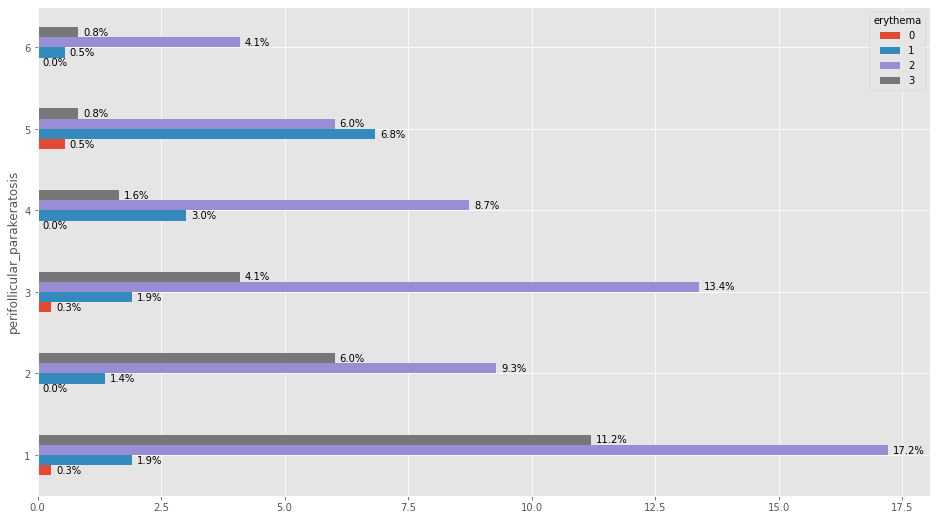

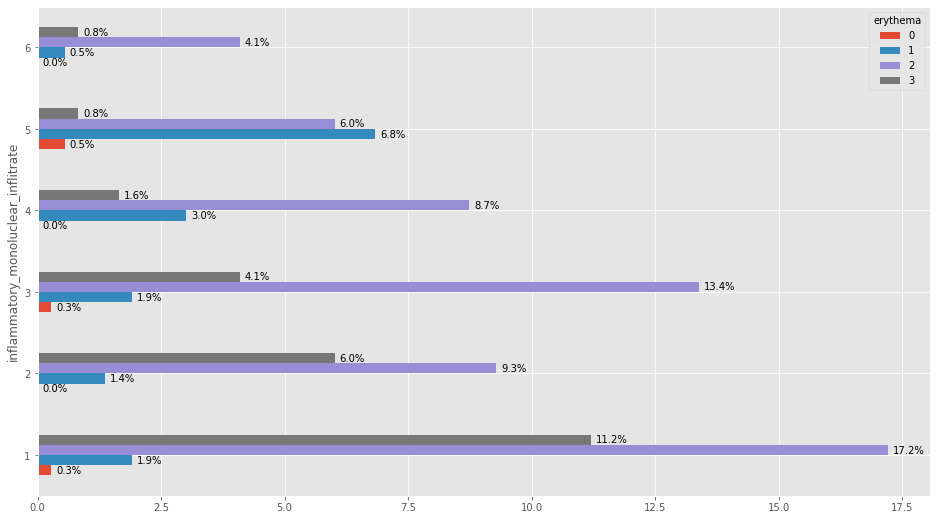

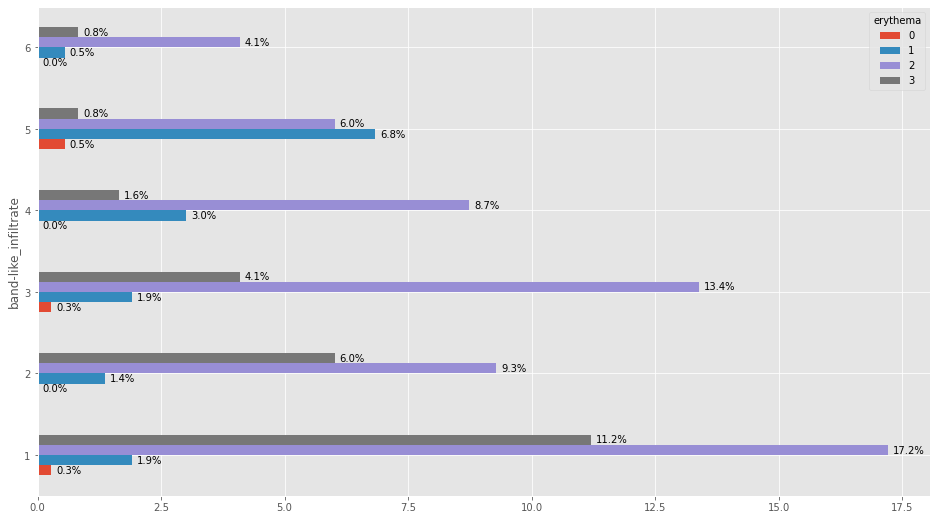

In [92]:
for i in col:
    ax = (data[['disease','erythema']].value_counts(normalize=True)*100).unstack().fillna(0).plot(kind='barh', figsize=(16,9), xlabel = i)
    for p in ax.patches:
        ax.annotate("%.1f%%" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
                xytext=(5, 0), textcoords='offset points', ha="left", va="center")

Below attributes have most leverage on disease:
- 'erythema', 'scaling', 'definite_borders', 'acanthosis', 'parakeratosis', 'inflammatory_monoluclear_inflitrate'

# CREATE A NEW COLUMN DISEASE 1

In [100]:
data['disease_1'] = [1 if i==1 else 0 for i in data['disease']]

In [101]:
data.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,age,disease,disease_1
0,2,2,0,3,0,0,0,0,1,0,...,0,3,0,0,0,1,0,55.0,2,0
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,1,0,8.0,1,1
2,2,1,2,3,1,3,0,3,0,0,...,2,3,2,0,0,2,3,26.0,3,0
3,2,2,2,0,0,0,0,0,3,2,...,0,0,0,0,0,3,0,40.0,1,1
4,2,3,2,2,2,2,0,2,0,0,...,3,2,3,0,0,2,3,45.0,3,0


# DATA SPLIT INTO X & Y

In [103]:
X_lr = data['age'].values.reshape(-1,1)
y_lr = data['disease_1']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_lr.shape, y_lr.shape

((366, 1), (366,))

# LINEAR MODEL: DISEASE_1 VS AGE

In [104]:
lr = LinearRegression()
lr.fit(X_lr,y_lr)
y_pred_lr = lr.predict(X_lr)

# PLOT LINEAR REGRESSION MODEL

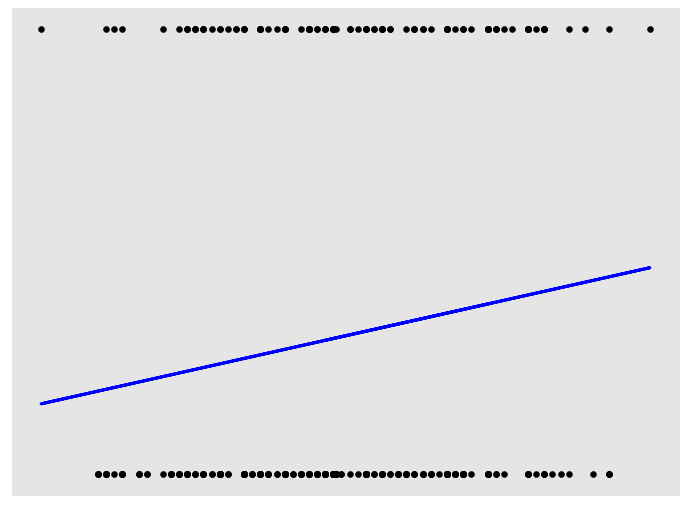

In [105]:
plt.style.use('ggplot')
plt.figure(figsize=(12,9))
plt.scatter(X_lr, y_lr, color="black")
plt.plot(X_lr, y_pred_lr, color="blue", linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

# R SQUARED

In [106]:
r2_score(y_lr, y_pred_lr)

0.017962960780911086

# MSE

In [107]:
mean_squared_error(y_lr, y_pred_lr)

0.208553477945778

# 3 FOLD CROSS VALIDATION

In [108]:
linear_model_cross_val = cross_val_score(lr, X_lr, y_lr, cv=3)
linear_model_cross_val.mean()

-0.01036201994585928

# NAIVE BAYES CLASSIFIER: DISEASE_1 VS TOP FIVE ATTRIBUTES

### X & Y SPLIT

In [109]:
X_nb = data[['family_history', 'spongiform_pustule','inflammatory_monoluclear_inflitrate', 'parakeratosis',
          'hyperkeratosis']]
y_nb = data['disease_1']

X_nb.shape, y_nb.shape

((366, 5), (366,))

### CREATE NAIVE BAYES MODEL

In [110]:
nb = BernoulliNB()
nb.fit(X_nb,y_nb)

BernoulliNB()

### CONFUSION MATRIX

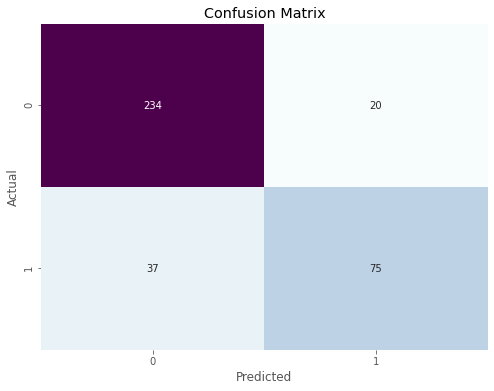

In [111]:
y_pred_nb = nb.predict(X_nb)
cm_nb = confusion_matrix(y_nb,y_pred_nb)
plt.figure(figsize=(8,6))
sns.heatmap(cm_nb, annot=True, cbar=False, fmt='0.4g', cmap='BuPu');
plt.title('Confusion Matrix');
plt.xlabel('Predicted');
plt.ylabel('Actual');
plt.show()

### ACCURACY

In [112]:
accuracy_score(y_nb, y_pred_nb)

0.8442622950819673

### EVALUATE MODEL USING 3 FOLD CROSS VALIDATION

In [113]:
naive_bayes_cross_val = cross_val_score(nb, X_nb, y_nb, cv=3)
naive_bayes_cross_val.mean()

0.8415300546448088

# DECISION TREE: DISEASE VS ALL ATTRIBUTES

### X & Y SPLIT

In [114]:
X_dt = data.drop(['disease', 'disease_1'], axis=1)
y_dt = data['disease']
X_dt.shape, y_dt.shape

((366, 34), (366,))

We have to remove disease_1 due to data leakage

### CREATE DECISION TREE MODEL USING GINI

In [115]:
dt = DecisionTreeClassifier(criterion='gini')
dt.fit(X_dt,y_dt)

DecisionTreeClassifier()

### PLOTING GENERATED TREE

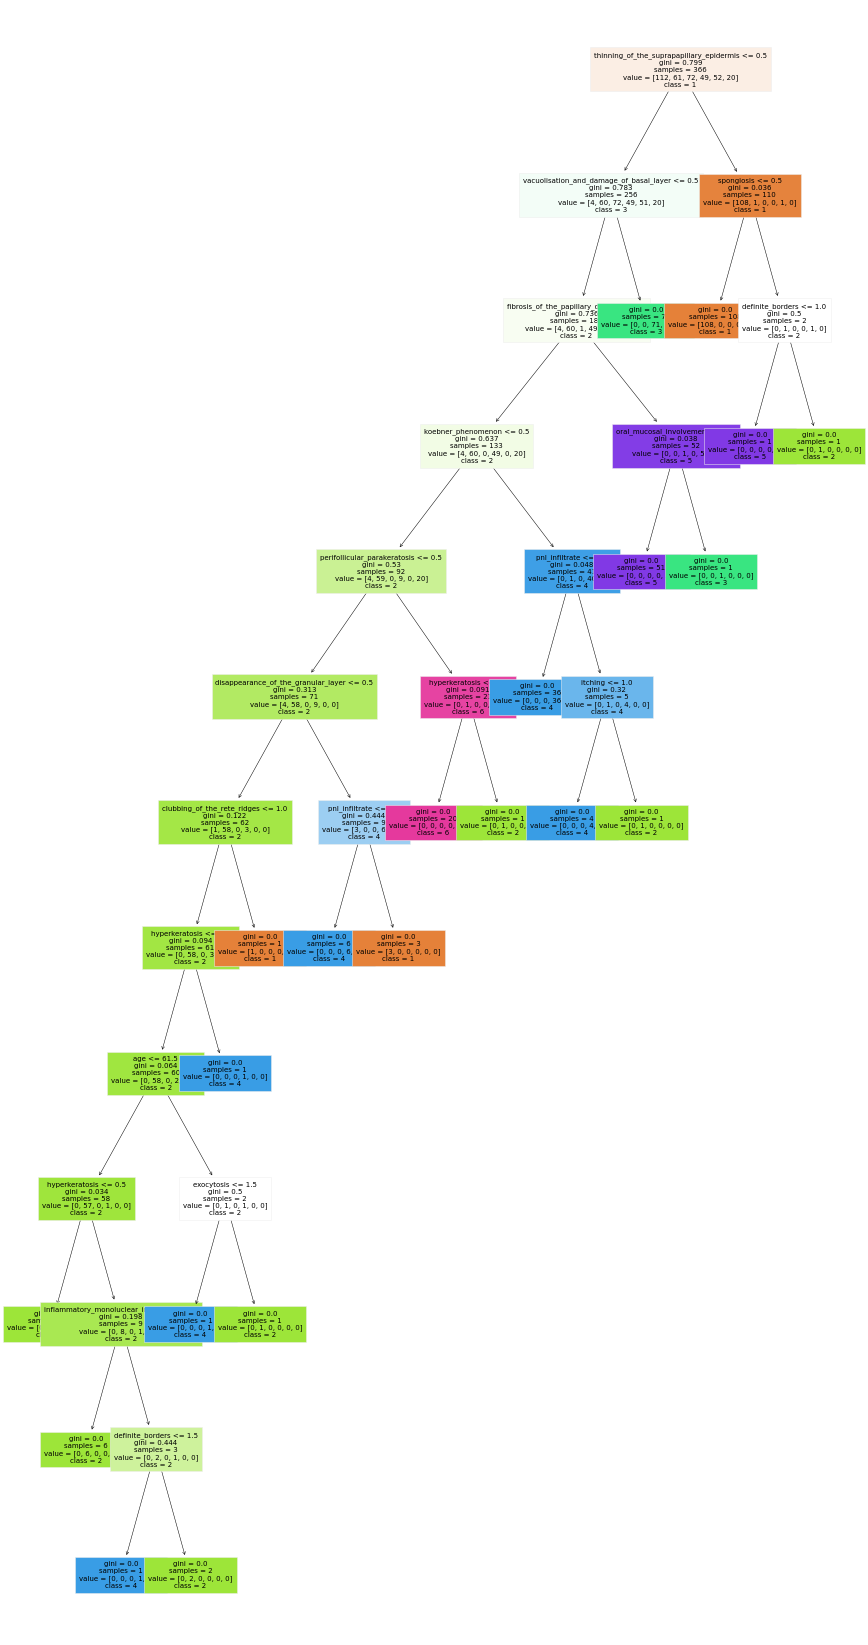

In [133]:
plt.figure(figsize=(15,30))
tree.plot_tree(dt, feature_names=X_dt.keys(), class_names=['1','2','3','4','5','6'], filled=True, fontsize=7);

Note:
- if thinning_of_the_suprapapillary_epidermis is >=0.5 then disease class 1 
- if thinning_of_the_suprapapillary_epidermis is <=0.5 & vacuolisation_and_damage_of_basal_layer<=0.5 then class 3

### CONFUSION MATRIX

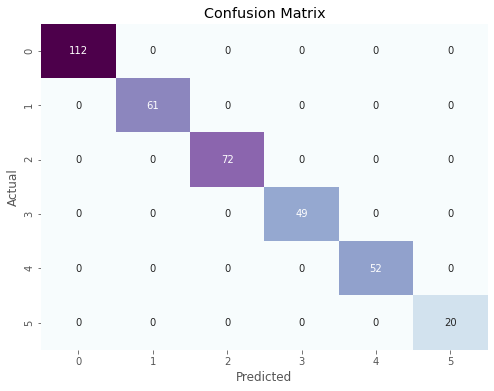

In [29]:
y_pred_dt = dt.predict(X_dt)
cm = confusion_matrix(y_dt,y_pred_dt)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cbar=False, fmt='0.4g', cmap='BuPu');
plt.title('Confusion Matrix');
plt.xlabel('Predicted');
plt.ylabel('Actual');
plt.show()

### ACCURACY

In [30]:
accuracy_score(y_dt, y_pred_dt)

1.0

### EVALUATE MODEL USING 3 FOLD CROSS VALIDATION

In [31]:
decision_tree_cross_val = cross_val_score(dt, X_dt, y_dt, cv=3)
decision_tree_cross_val.mean()

0.9153005464480874

# RANDOM FOREST

### X & Y SPLIT

In [134]:
X_rf = data.drop(['disease','disease_1'], axis=1)
y_rf = data['disease']
X_rf.shape, y_rf.shape

((366, 34), (366,))

### CREATE RANDOM FOREST MODEL

In [135]:
rf = RandomForestClassifier()
rf.fit(X_rf,y_rf)

RandomForestClassifier()

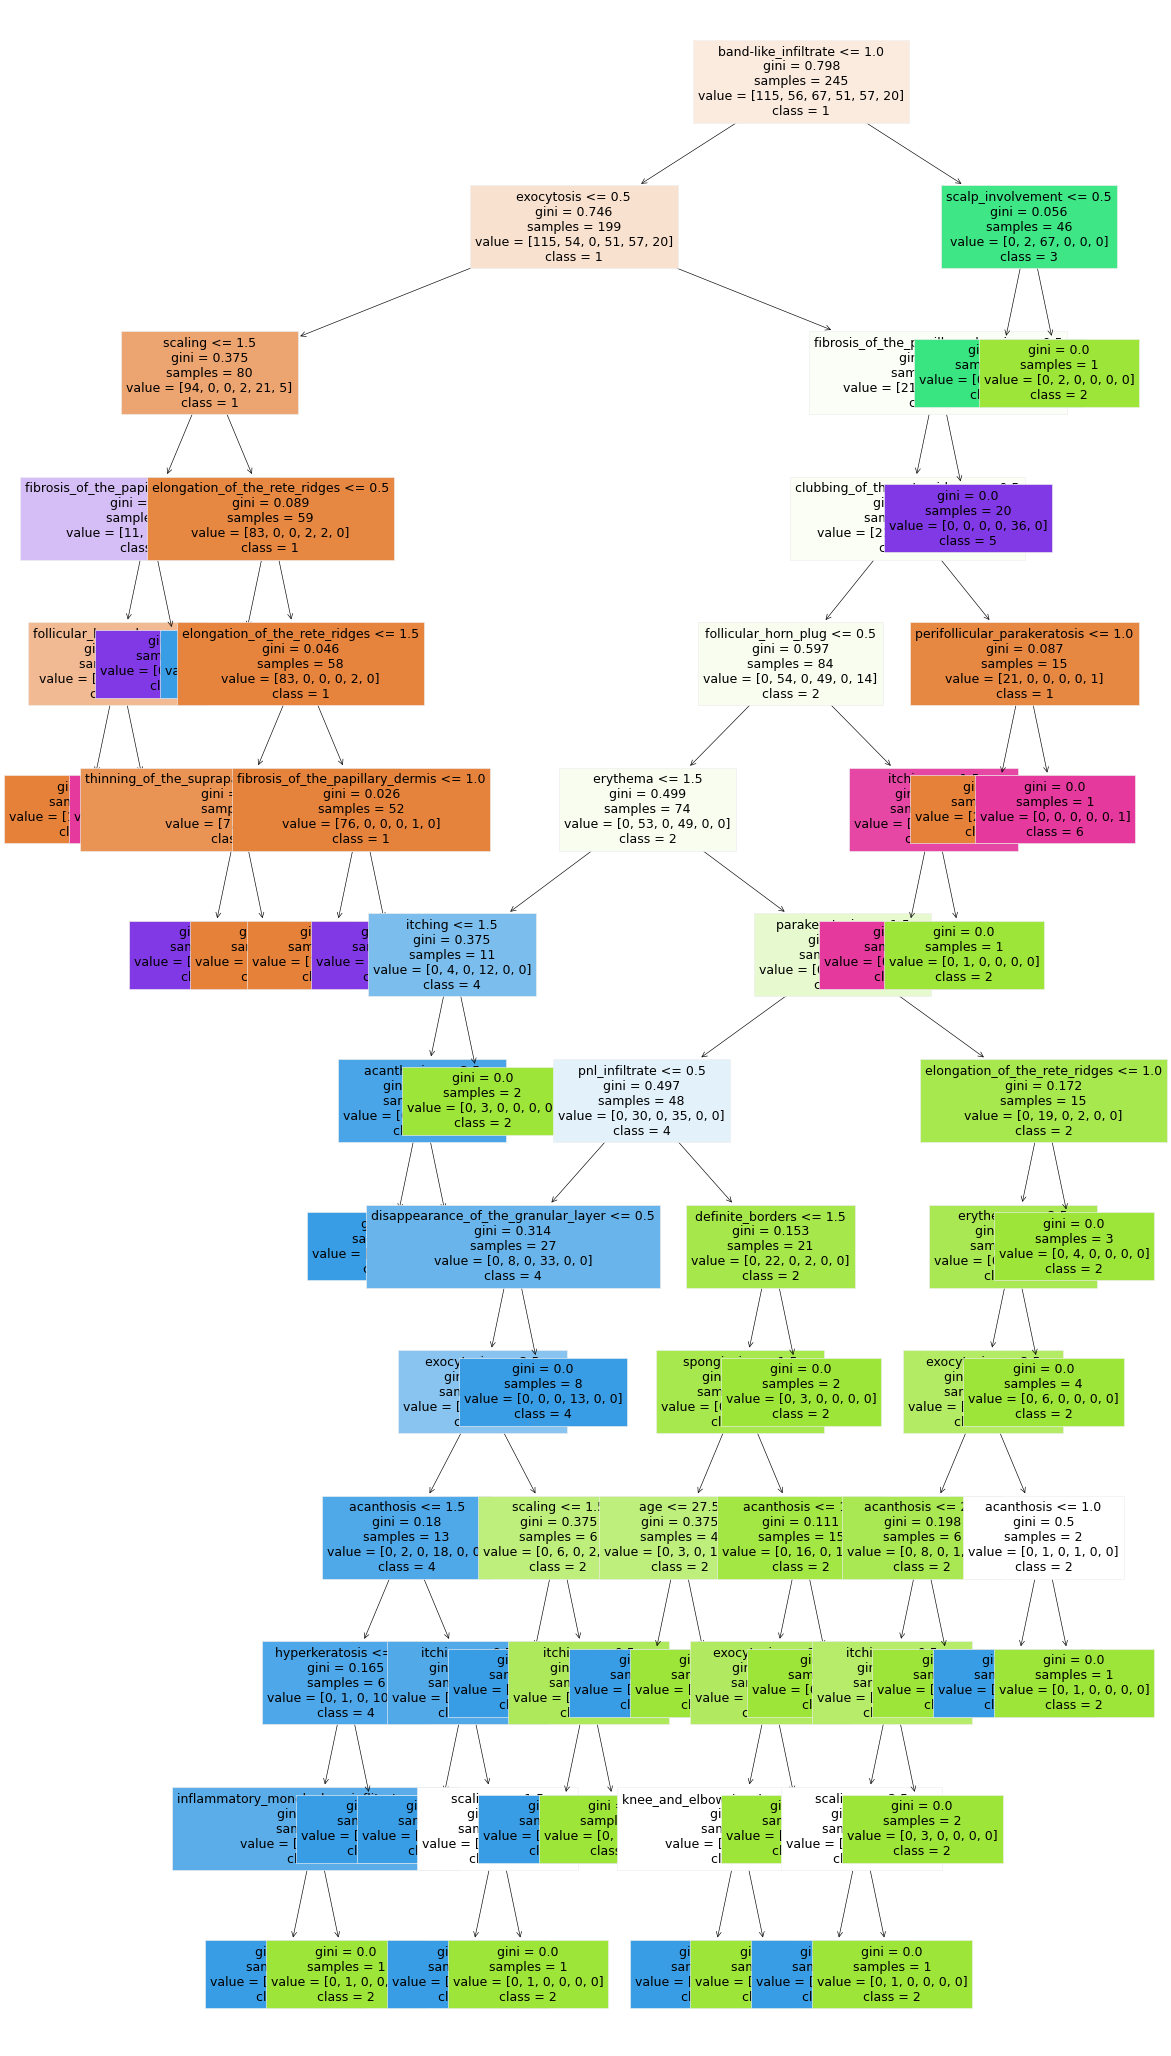

In [137]:
plt.figure(figsize=(15,30), dpi=90)
tree.plot_tree(rf.estimators_[0], feature_names=X_rf.keys(), class_names=['1','2','3','4','5','6'], filled=True, fontsize=10);

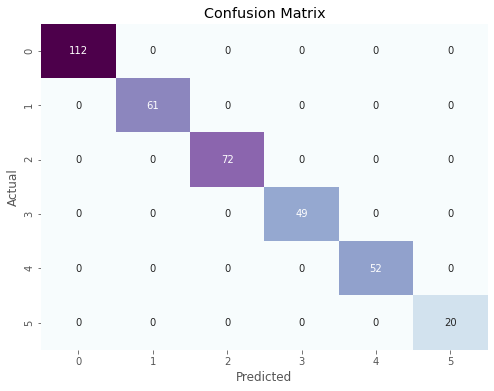

In [138]:
y_pred_rf = rf.predict(X_rf)
cm_rf = confusion_matrix(y_rf,y_pred_rf)
plt.figure(figsize=(8,6))
sns.heatmap(cm_rf, annot=True, cbar=False, fmt='0.4g', cmap='BuPu');
plt.title('Confusion Matrix');
plt.xlabel('Predicted');
plt.ylabel('Actual');
plt.show()

### ACCURACY

In [36]:
accuracy_score(y_rf, y_pred_rf)

1.0

### EVALUATE MODEL USING 3 FOLD CROSS VALIDATION

In [37]:
random_forest_cross_val = cross_val_score(rf, X_rf, y_rf, cv=3)
random_forest_cross_val.mean()

0.9754098360655737

### FEATURE IMPORTANCE PLOT

Text(0.5, 0, 'Relative Importance')

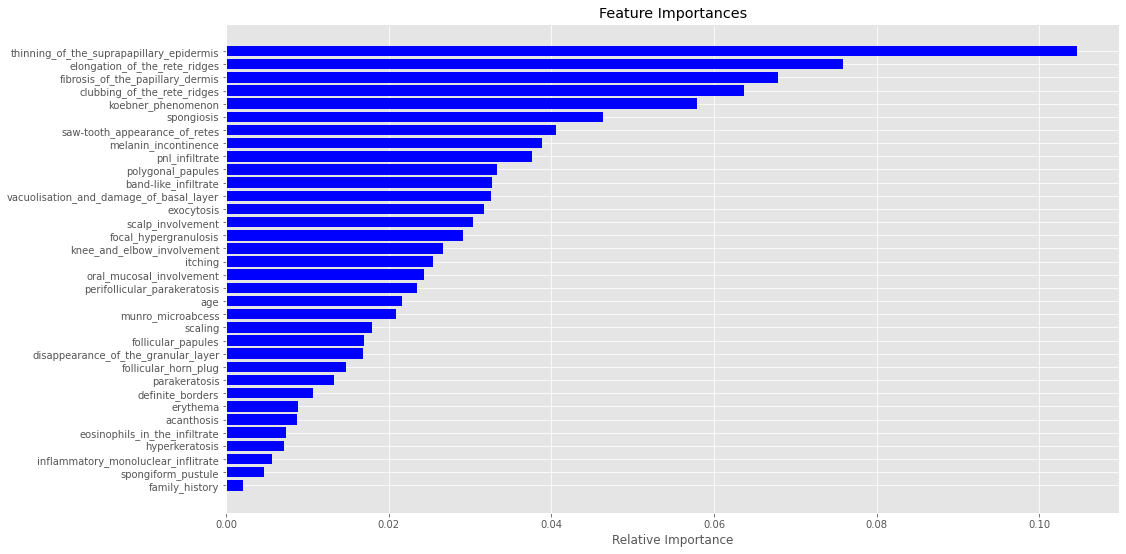

In [38]:
features=X_rf.keys()
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(16,9))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

At each split in each tree, the improvement in the split-criterion is the importance measure attributed to the splitting variable, and is accumulated over all the trees in the forest separately for each variable.

# MODEL PERFORMANCE COMPARISION

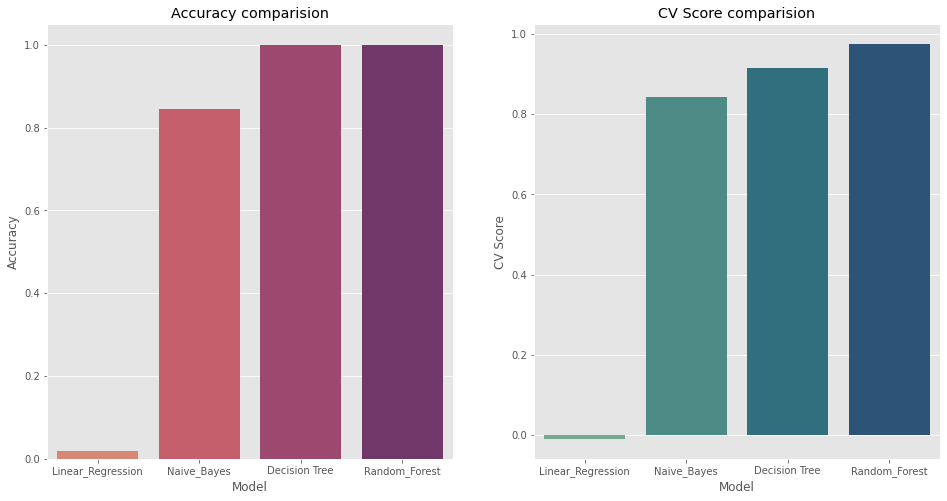

In [64]:
accuracy_lr = r2_score(y_lr, y_pred_lr)
cv_lr = linear_model_cross_val.mean()

accuracy_nb = accuracy_score(y_nb, y_pred_nb)
cv_nb = naive_bayes_cross_val.mean()

accuracy_dt = accuracy_score(y_dt, y_pred_dt)
cv_dt = decision_tree_cross_val.mean()

accuracy_rf = accuracy_score(y_rf, y_pred_rf)
cv_rf = random_forest_cross_val.mean()

accuracy = [accuracy_lr, accuracy_nb, accuracy_dt, accuracy_rf]
cv_score = [cv_lr, cv_nb, cv_dt, cv_rf]

labels = ['Linear_Regression', 'Naive_Bayes', 'Decision Tree', 'Random_Forest']

plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.barplot(x=labels, y=accuracy, palette='flare');
plt.title('Accuracy comparision');
plt.xlabel('Model')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
sns.barplot(x=labels, y=cv_score, palette='crest');
plt.title('CV Score comparision');
plt.xlabel('Model')
plt.ylabel('CV Score')
plt.show()

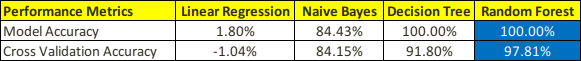

Note:
- Performance of the random forest model is very high both in model training and in cross validation